In [1]:
from utils import base_model, feature_importance, preprocessing, model_report, roc_auc_curve_plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import os

In [2]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

In [3]:
X, y = preprocessing(df)

In [4]:
X.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain'],
      dtype='object')

In [5]:
random.seed(42)
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

최적 하이퍼 파라미터:  {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 263}
최고 예측 정확도: 0.9464
Accuracy: 0.8337
AUC: 0.8634
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       647
           1       0.55      0.67      0.61       153

    accuracy                           0.83       800
   macro avg       0.74      0.77      0.75       800
weighted avg       0.85      0.83      0.84       800



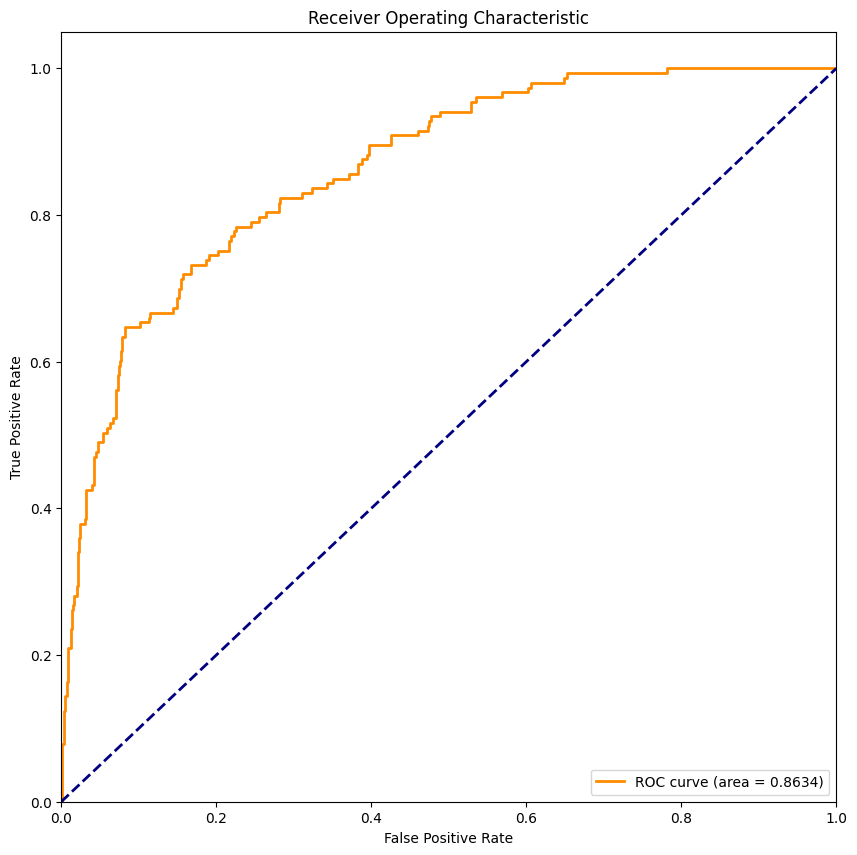

In [7]:
model = base_model(X_train, y_train)

Accuracy: 0.8340
AUC: 0.8589
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.56      0.68      0.62       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.85      0.83      0.84      2000



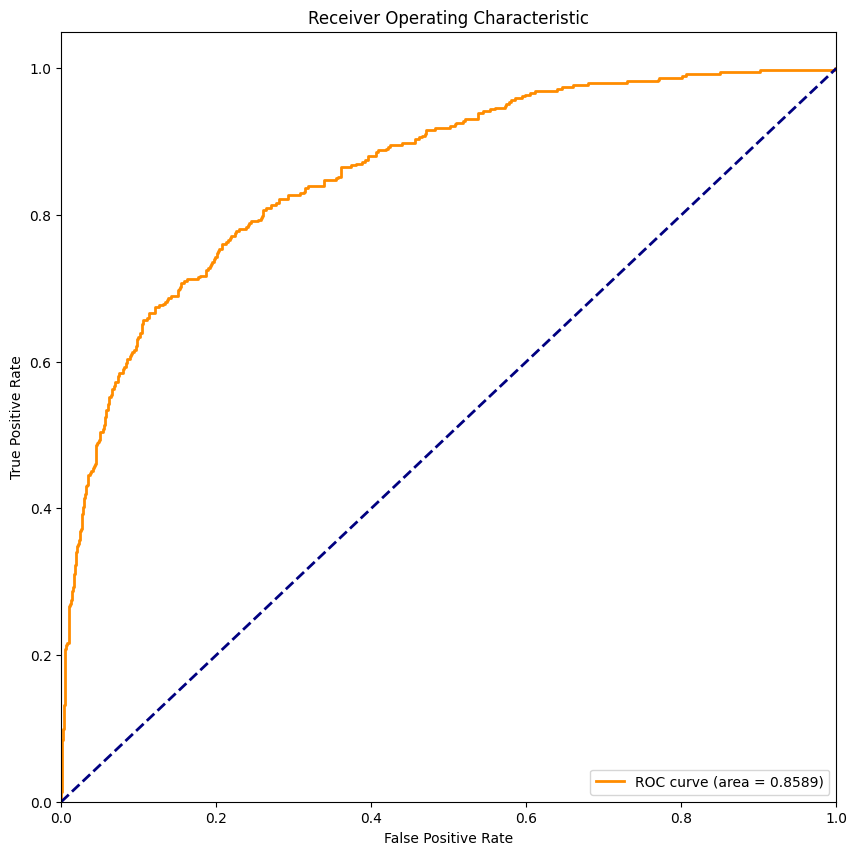

In [8]:
model_report(model, X_test, y_test)

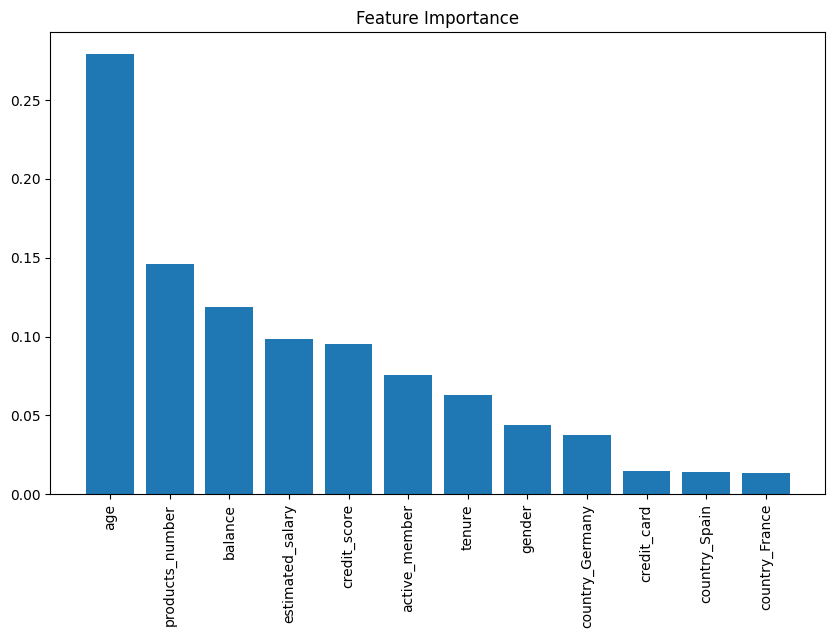

In [9]:
feature_importance(model, X_train)

In [11]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)